## 원본 코드 

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


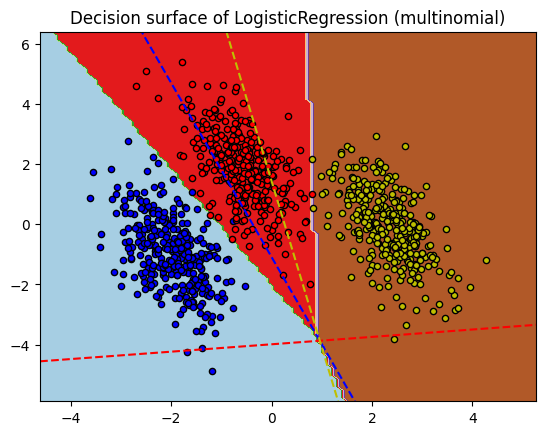

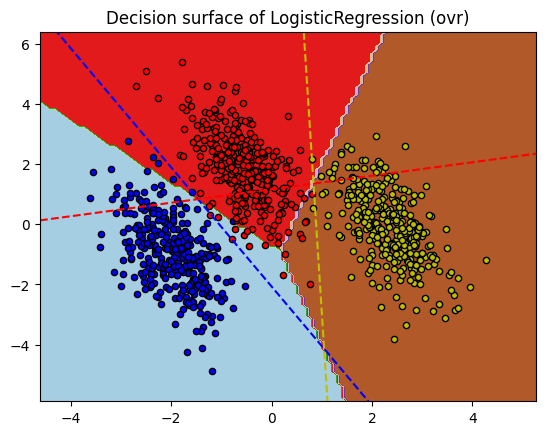

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

## 과제 코드

training score : 0.995 (multinomial)


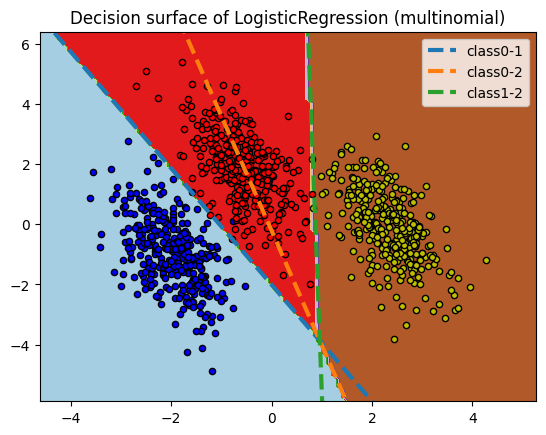

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)


clf = LogisticRegression(
    solver="sag", max_iter=1000, random_state=42, multi_class="multinomial"
).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), "multinomial"))

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.title("Decision surface of LogisticRegression (%s)" % "multinomial")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
    )

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

from itertools import combinations

def line(x0, c1, c2): #multinomial이므로 경계식을 산출할 두 클래스를 선정해 줘야함
    a1, b1 = coef[c1,:] #class1에 대한 x1, x2의 계수
    a2, b2 = coef[c2,:] #class2에 대한 x1, x2의 계수
    constant1 = intercept[c1]
    constant2 = intercept[c2]
    return -((a1-a2)/(b1-b2))*x0 - (constant1-constant2)/(b1-b2)

comb = combinations(clf.classes_, 2) # 3개 클래스 중 2개를 뽑아 조합 생성

for c1, c2 in list(comb): #결정경계 시각화
    plt.plot([xmin, xmax], [line(xmin, c1, c2), line(xmax, c1, c2)], ls="--", linewidth = 3, label = f'class{c1}-{c2}')


plt.legend()
plt.show()